In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('bikesharing_clean.csv')
data.head()

,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985
1,1,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801
2,1,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349
3,1,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562
4,1,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600


In [3]:
data.describe()

,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2.496580,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,4504.348837
std,1.110807,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,1937.211452
min,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,22.000000
25%,2.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,3152.000000
50%,3.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,4548.000000
75%,3.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,5956.000000
max,4.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,8714.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      731 non-null    int64  
 1   mnth        731 non-null    int64  
 2   holiday     731 non-null    int64  
 3   weekday     731 non-null    int64  
 4   workingday  731 non-null    int64  
 5   weathersit  731 non-null    int64  
 6   temp        731 non-null    float64
 7   atemp       731 non-null    float64
 8   hum         731 non-null    float64
 9   windspeed   731 non-null    float64
 10  cnt         731 non-null    int64  
dtypes: float64(4), int64(7)
memory usage: 62.9 KB


In [5]:
data.corr(numeric_only=True)

,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
season,1.000000,0.831440,-0.010537,-0.003080,0.012485,0.019211,0.334315,0.342876,0.205445,-0.229046,0.406100
mnth,0.831440,1.000000,0.019191,0.009509,-0.005901,0.043528,0.220205,0.227459,0.222204,-0.207502,0.279977
holiday,-0.010537,0.019191,1.000000,-0.101960,-0.253023,-0.034627,-0.028556,-0.032507,-0.015937,0.006292,-0.068348
weekday,-0.003080,0.009509,-0.101960,1.000000,0.035790,0.031087,-0.000170,-0.007537,-0.052232,0.014282,0.067443
workingday,0.012485,-0.005901,-0.253023,0.035790,1.000000,0.061200,0.052660,0.052182,0.024327,-0.018796,0.061156
weathersit,0.019211,0.043528,-0.034627,0.031087,0.061200,1.000000,-0.120602,-0.121583,0.591045,0.039511,-0.297391
temp,0.334315,0.220205,-0.028556,-0.000170,0.052660,-0.120602,1.000000,0.991702,0.126963,-0.157944,0.627494
atemp,0.342876,0.227459,-0.032507,-0.007537,0.052182,-0.121583,0.991702,1.000000,0.139988,-0.183643,0.631066
hum,0.205445,0.222204,-0.015937,-0.052232,0.024327,0.591045,0.126963,0.139988,1.000000,-0.248489,-0.100659
windspeed,-0.229046,-0.207502,0.006292,0.014282,-0.018796,0.039511,-0.157944,-0.183643,-0.248489,1.000000,-0.234545


In [6]:
cov_mat = np.cov(data.drop('cnt', axis=1).T)

In [7]:
eig_val, eig_vec = np.linalg.eig(cov_mat)

In [8]:
eig_val.sort()

In [9]:
eig_val=eig_val[::-1]

In [10]:
exp_variance = np.cumsum(eig_val)/sum(eig_val)
print(exp_variance)

[0.7192731  0.94515306 0.96551732 0.98266022 0.99472509 0.99759886
 0.99903739 0.99971551 0.99998693 1.        ]


We see that first two components explaint about 94.5% variance.

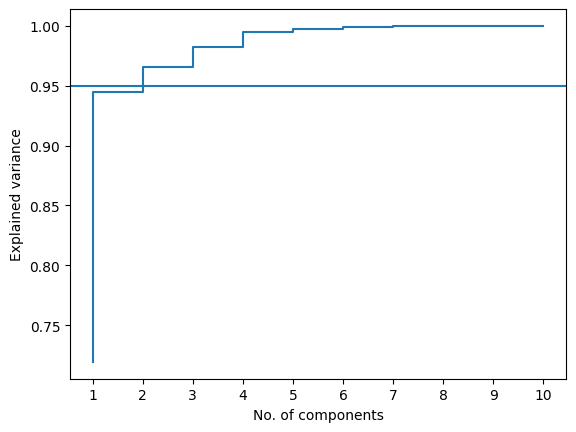

In [11]:
plt.step(np.arange(1,len(exp_variance)+1),np.cumsum(eig_val)/sum(eig_val))
plt.axhline(0.95)
plt.xticks(ticks=np.arange(1,len(exp_variance)+1))
plt.xlabel('No. of components')
plt.ylabel('Explained variance')
plt.show()

#### PCA

In [12]:
from sklearn.decomposition import PCA

In [13]:
X = data.drop('cnt', axis=1)
y = data['cnt']
pca = PCA(n_components=2)

In [14]:
X.columns

Index(['season', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit',
       'temp', 'atemp', 'hum', 'windspeed'],
      dtype='object')

In [15]:
X_pca = pca.fit_transform(X)

In [16]:
loading_df = pd.DataFrame(pca.components_.T,columns=['pc1','pc2'], index=X.columns)

In [17]:
loading_df

,pc1,pc2
season,0.265811,-0.008209
mnth,0.963788,-0.005010
holiday,0.000773,-0.008618
weekday,0.007016,0.999829
workingday,-0.000555,0.008852
weathersit,0.006587,0.008986
temp,0.011941,-0.000356
atemp,0.010969,-0.000924
hum,0.008937,-0.003826
windspeed,-0.004595,0.000668


In [18]:
for i in range(len(X.columns)):
    norm = np.sqrt(loading_df.iloc[i,0]**2+loading_df.iloc[i,1]**2)
    loading_df.iloc[i,:] = loading_df.iloc[i,:]/norm

In [19]:
loading_df

,pc1,pc2
season,0.999523,-0.030869
mnth,0.999986,-0.005198
holiday,0.089390,-0.995997
weekday,0.007017,0.999975
workingday,-0.062565,0.998041
weathersit,0.591248,0.806490
temp,0.999555,-0.029815
atemp,0.996468,-0.083976
hum,0.919298,-0.393562
windspeed,-0.989605,0.143812


In [20]:
pc1 = X_pca[:,0]
pc2 = X_pca[:,1]

pc1_scaled = pc1/(pc1.max()-pc1.min())
pc2_scaled = pc2/(pc2.max()-pc2.min())

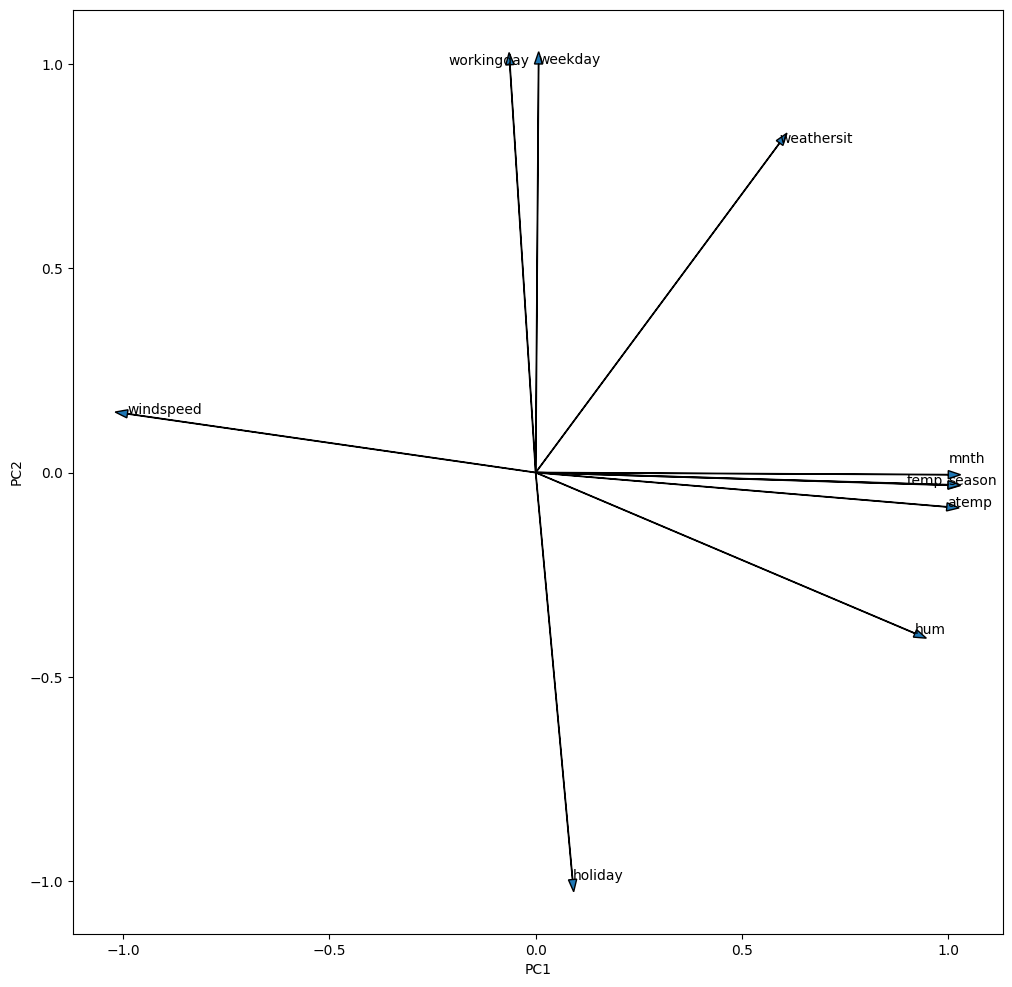

In [21]:
fig, ax = plt.subplots(figsize=(12,12))
for i in range(len(X.columns)):
    ax.arrow(x=0,y=0,dx=loading_df.iloc[i,0], dy=loading_df.iloc[i,1],head_width = 0.02)
    if i==4:
        ax.text(x=loading_df.iloc[i,0]-0.15, y=loading_df.iloc[i,1], s=X.columns[i])
    elif i==1:
        ax.text(x=loading_df.iloc[i,0], y=loading_df.iloc[i,1]+0.03, s=X.columns[i])
    elif i==6:
        ax.text(x=loading_df.iloc[i,0]-0.1, y=loading_df.iloc[i,1], s=X.columns[i])
    else:
        ax.text(x=loading_df.iloc[i,0], y=loading_df.iloc[i,1], s=X.columns[i])
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')

plt.show()

#### Now we fit a linear regression model using the first two components.

In [22]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [24]:
pipe = Pipeline([('pca', PCA()), ('LR', LinearRegression(fit_intercept=True))])
param_grid = {
    'pca__n_components': np.arange(1, X.shape[1]+1,1)
}

gs = GridSearchCV(pipe, param_grid=param_grid, n_jobs=2, verbose=3)

gs.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END ..............pca__n_components=1;, score=-0.037 total time=   0.0s
[CV 3/5] END ...............pca__n_components=1;, score=0.042 total time=   0.0s
[CV 4/5] END ...............pca__n_components=1;, score=0.098 total time=   0.0s
[CV 5/5] END ...............pca__n_components=1;, score=0.145 total time=   0.0s
[CV 1/5] END ..............pca__n_components=2;, score=-0.034 total time=   0.0s
[CV 2/5] END ...............pca__n_components=2;, score=0.139 total time=   0.0s
[CV 3/5] END ...............pca__n_components=2;, score=0.032 total time=   0.0s
[CV 4/5] END ...............pca__n_components=2;, score=0.104 total time=   0.0s
[CV 2/5] END ...............pca__n_components=1;, score=0.148 total time=   0.0s
[CV 5/5] END ...............pca__n_components=2;, score=0.146 total time=   0.0s
[CV 1/5] END ...............pca__n_components=3;, score=0.156 total time=   0.0s
[CV 2/5] END ...............pca__n_components=3;

GridSearchCV(estimator=Pipeline(steps=[('pca', PCA()),
                                       ('LR', LinearRegression())]),
             n_jobs=2,
             param_grid={'pca__n_components': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])},
             verbose=3)

In [25]:
gs.best_params_

{'pca__n_components': np.int64(9)}

In [26]:
gs.best_score_

np.float64(0.5188771295612606)

So GridSearchSV suggests that we get best score for 9 components. But more than 99% variance is explained with just 5 components. Let us see if we can get a decent score with lesser parameters. We will try with 5 to 9 parameters. We will stop if R2 score about 0.51 is acheived.

In [27]:
n_comp = np.arange(5, 10)
best_ncomp = 5
best_score = 0

for n in n_comp:
    pipe = Pipeline([('pca', PCA(n_components=n)),('LR',LinearRegression(fit_intercept=True))])
    score = pipe.fit(X_train, y_train).score(X_test, y_test)
    if score > 0.51:
        print(n)
        print(score)
        break

6
0.5138486636499154


So we see that with 6 components we acheived r2 score=0.5138. We will stick with 6 components for further analysis.

#### Residual Analysis

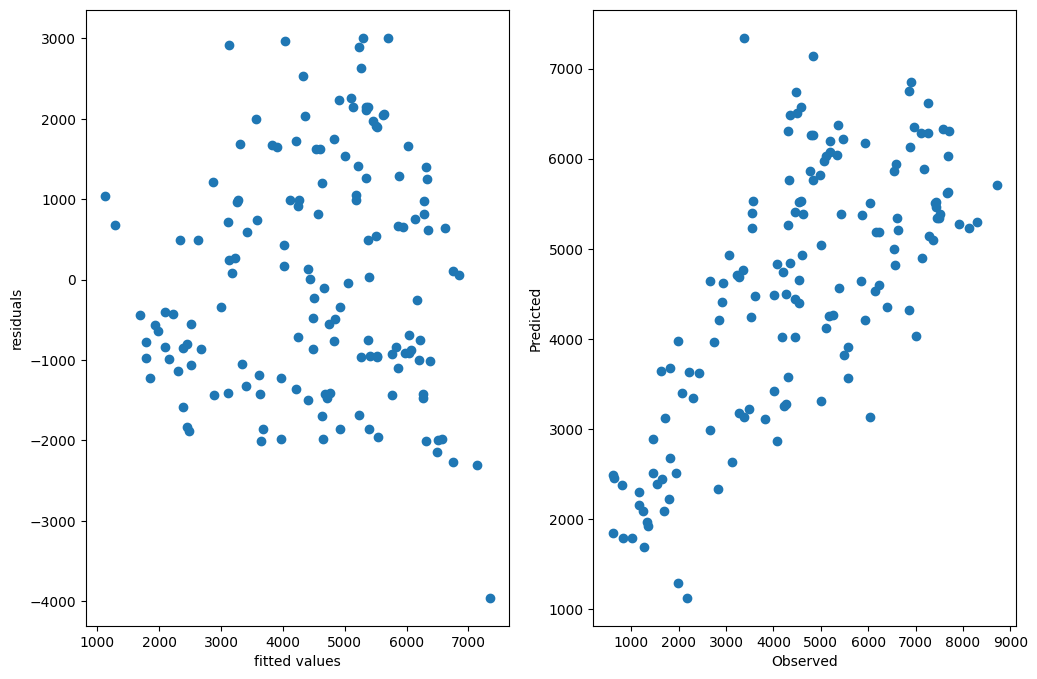

In [28]:
pipe = Pipeline([('pca', PCA(n_components=6)),('LR',LinearRegression(fit_intercept=True))])

y_pred = pipe.fit(X_train, y_train).predict(X_test)

res = y_test - y_pred

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,8))
ax_flat = ax.flatten()

ax_flat[0].scatter(y_pred, res)
ax_flat[0].set_xlabel('fitted values')
ax_flat[0].set_ylabel('residuals')

ax_flat[1].scatter(y_test, y_pred)
ax_flat[1].set_xlabel('Observed')
ax_flat[1].set_ylabel('Predicted')

plt.show()